In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import emcee

In [2]:
def roll(theta):
    theta1 = np.roll(theta, 1)
    theta2 = np.roll(theta, -1)
    return theta1, theta2

def pi(theta):
    theta1, _ = roll(theta)
    return np.sum(np.cos(theta-theta1))

def logpi(theta, beta):
    theta1, theta2 = roll(theta)
    return beta * (-np.sin(theta-theta1)-np.sin(theta-theta2))

def rec8(theta, h, beta, rej = False):
    noise = npr.choice([-1,1], size=L)
    logpi1 = logpi(theta, beta)
    theta2 = theta + h * logpi1 + np.sqrt(2*h) * noise
    theta2 = np.mod((theta2 + np.pi), 2*np.pi) - np.pi
    logpi2 = logpi(theta2, beta)
    if rej == False:
        return theta2
    pi1, pi2 = pi(theta), pi(theta2)
    s1 = np.sum((theta2-theta-h*logpi1/pi1)**2)
    s2 = np.sum((theta-theta2-h*logpi2/pi2)**2)
    p = pi2/pi1 * np.exp((s1-s2)/(4*h))
    if npr.random() < p:
        return theta
    else:
        return theta2
    

def iter8(h, L, beta, rej = False):
    theta = npr.uniform(-np.pi, np.pi, size=L)
    itermax = int(100/h)
    M = np.zeros(itermax)
    for i in range(itermax):
        theta = rec8(theta, h, beta, rej=rej)
        M[i] = np.sum(np.cos(theta))
    return M

def get_iat(M):
    return emcee.autocorr.integrated_time(M, tol=0)[0]

In [7]:
L = 10
beta = 1/6
h0 = np.arange(.05, .16, .02)
res1 = np.zeros(6)
res2 = np.zeros(6)
for i in range(6):
    h = h0[i]
    M1 = iter8(h, L, beta)
    M2 = iter8(h, L, beta, rej=True)
    res1[i] = get_iat(M1)
    res2[i] = get_iat(M2)

C:\Users\zixia\AppData\Local\Temp\ipykernel_11984\4263963577.py:25: RuntimeWarning: overflow encountered in exp
  p = pi2/pi1 * np.exp((s1-s2)/(4*h))


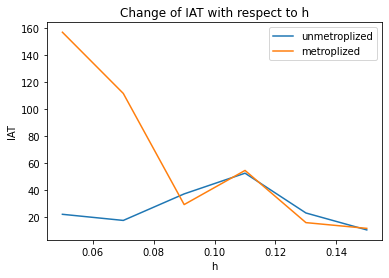

In [8]:
plt.plot(h0, res1, label="unmetroplized")
plt.plot(h0, res2, label="metroplized")
plt.xlabel("h")
plt.ylabel("IAT")
plt.title("Change of IAT with respect to h")
plt.legend()
plt.show()

In [11]:
L0 = list(map(int, np.logspace(1,2,6)))
beta = 1/6
h = .05
res1 = np.zeros(6)
res2 = np.zeros(6)
for i in range(6):
    L = L0[i]
    M1 = iter8(h, L, beta)
    M2 = iter8(h, L, beta, rej=True)
    res1[i] = get_iat(M1)
    res2[i] = get_iat(M2)

C:\Users\zixia\AppData\Local\Temp\ipykernel_11984\4263963577.py:25: RuntimeWarning: overflow encountered in exp
  p = pi2/pi1 * np.exp((s1-s2)/(4*h))
C:\Users\zixia\AppData\Local\Temp\ipykernel_11984\4263963577.py:25: RuntimeWarning: overflow encountered in double_scalars
  p = pi2/pi1 * np.exp((s1-s2)/(4*h))


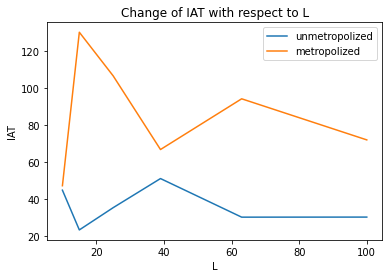

In [12]:
plt.plot(L0, res1, label="unmetropolized")
plt.plot(L0, res2, label="metropolized")
plt.xlabel("L")
plt.ylabel("IAT")
plt.title("Change of IAT with respect to L")
plt.legend()
plt.show()